In [9]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from matplotlib import animation
%matplotlib notebook

In [10]:
def logistic(r, x):
    return r * x * (1 - x)

<IPython.core.display.Javascript object>


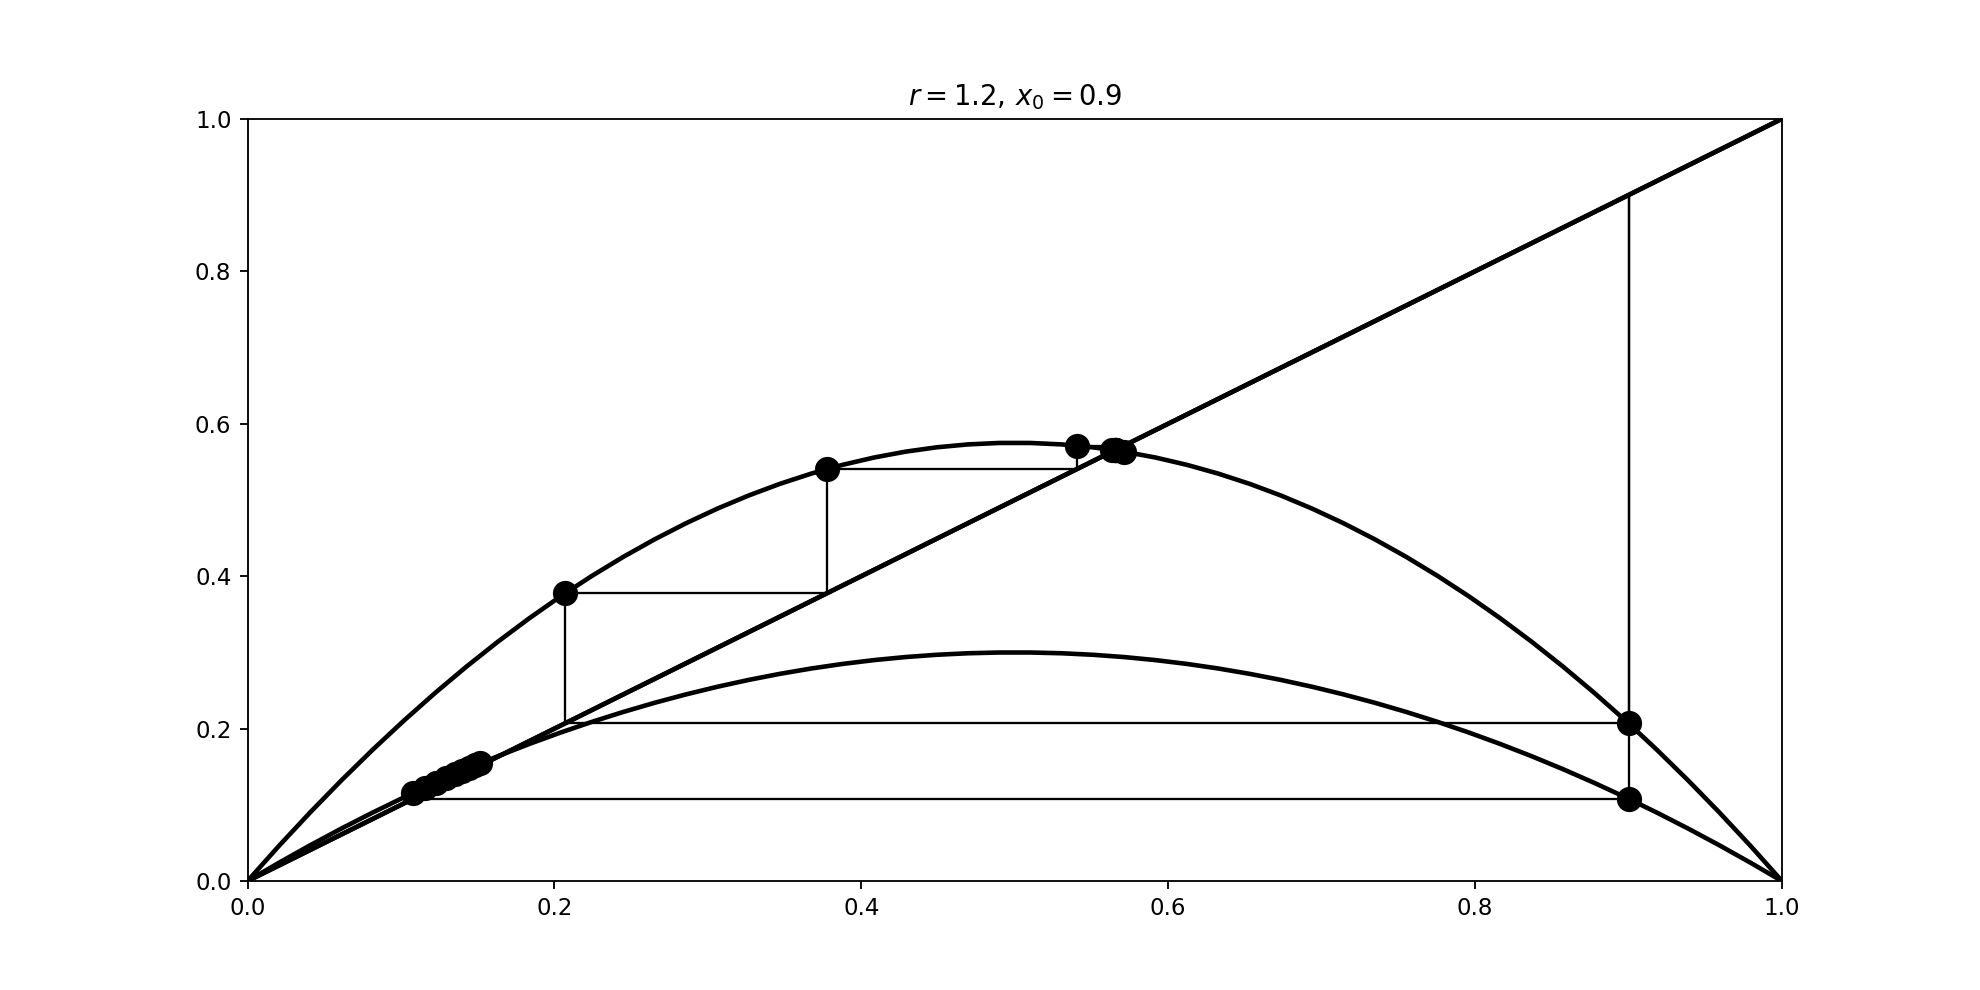

interactive(children=(FloatSlider(value=2.0, description='r', max=4.0), Button(description='Run Interact', sty…

In [11]:
def plot_system(r, x0, n):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig, ax = plt.subplots(1, 1, figsize=(12, 6),
                               sharey=True)
interactive(plot_system,{'manual': True}, r=(0,4,0.1), x0=fixed(0.9), n=fixed(10) )

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6),
                               sharey=True)
line, = ax.plot([], [], lw=2)

def init():
    # Plot the function and the
    # y=x diagonal line.
    line.set_data([], [])
    ax.plot([0, 1], [0, 1], 'k', lw=2)
    return line,
    
def animate(r, x=0.1, n=20):
    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    for i in range(n):
        y = logistic(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10)
        line.set_data([x],[y])
        x=y
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=5, interval=200, blit=False)

In [ ]:
def mandelbrot(largeur, hauteur, max_iteration, xmin, xmax, ymin, ymax):
    mandelbrot_mat = np.zeros((largeur, hauteur))
    for x in range(hauteur):
        cx = (x * (xmax - xmin) / hauteur + xmin)
        for y in range(largeur):
            cy = (y * (ymin - ymax) / largeur + ymax)
            xn, yn, n = 0, 0, 0
            while (xn**2 + yn**2) < 4 and n < max_iteration:
                tmp_x, tmp_y = xn, yn
                xn = tmp_x**2 - tmp_y**2 + cx
                yn = 2 * tmp_x * tmp_y + cy
                n = n + 1
            if n < max_iteration:
                mandelbrot_mat[y, x] = 1.
    return mandelbrot_mat

Z=mandelbrot(500,500, 100, -2,0.5, -1.25, 1.25 )

In [ ]:
fig = plt.figure()
fig.suptitle("Ensemble de mandelbrot")
im = plt.imshow(Z)
plt.colorbar()
plt.show()